<a href="https://www.kaggle.com/code/filipkin/warsaw-flats?scriptVersionId=220307056" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [521]:
# Standard library imports
import math  # Provides mathematical functions
import re    # Provides regular expression matching operations

# Third-party imports
import numpy as np  # Provides support for large, multi-dimensional arrays and matrices
import pandas as pd  # Provides data structures and data analysis tools
import matplotlib.pyplot as plt  # Provides a MATLAB-like interface for plotting
import seaborn as sns  # Provides a high-level interface for drawing attractive statistical graphics
import missingno as msno  # Provides visualizations for missing data
import scipy as sc  # Provides scientific computing tools

# IPython display for rich output
from IPython.display import display  # Enables rich display of objects in Jupyter notebooks

# Scikit-learn imports for machine learning
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor  # Ensemble methods for regression
from sklearn.impute import KNNImputer, SimpleImputer  # Imputation methods for handling missing values
from sklearn.model_selection import train_test_split  # Tools for splitting datasets into training and testing sets
from sklearn.preprocessing import OneHotEncoder  # Converts categorical variables into a format that can be provided to ML algorithms
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import Lasso, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold


In [522]:
try:
    df = pd.read_csv("otodom_complete.csv", dtype={'id': 'Int64'})
except:
    df = pd.read_csv("/kaggle/input/warsaw-flat-rent-prices/otodom_complete.csv", dtype={'id': 'Int64'})

In [523]:
df.head()

,web-scraper-order,web-scraper-start-url,offer_url,offer_url-href,location,net_price,deposit,area,room_num,build_type,...,rest_info,offer_ID,next_pagination,next_pagination-href,add_cost,offer_last_update,second_page,second_page-href,third_page,third_page-href
0,1612265907-2487,https://www.otodom.pl/wynajem/mieszkanie/warsz...,37 m²\n \n ...,https://www.otodom.pl/pl/oferta/wynajme-od-zar...,"Warszawa, Włochy, ul. 1 Sierpnia",2 100 zł,Kaucja:2 100 zł,Powierzchnia:37 m²,Liczba pokoi:2,NaN,...,klimatyzacja,Nr oferty w Otodom: 61451923,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,Data aktualizacji: 3 dni temu,NaN,NaN,NaN,NaN
1,1612264314-1965,https://www.otodom.pl/wynajem/mieszkanie/warsz...,38 m²\n \n ...,https://www.otodom.pl/pl/oferta/2-pokoje-tanio...,"Warszawa, Mokotów, ul. Suwak 11",1 825 zł,Kaucja:3 400 zł,Powierzchnia:38 m²,Liczba pokoi:2,Rodzaj zabudowy:blok,...,garaż/miejsce parkingowewindapom. użytkowe,Nr oferty w Otodom: 61405987,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,Czynsz - dodatkowo:350 zł,Data aktualizacji: 2 dni temu,NaN,NaN,NaN,NaN
2,1612263242-1616,https://www.otodom.pl/wynajem/mieszkanie/warsz...,57 m²\n \n ...,https://www.otodom.pl/pl/oferta/wynajme-mieszk...,"Warszawa, Bielany, ul. Kwitnąca",3 300 zł,Kaucja:3 300 zł,Powierzchnia:57 m²,Liczba pokoi:3,Rodzaj zabudowy:blok,...,balkontylko dla niepalącychoddzielna kuchnia,Nr oferty w Otodom: 61375474,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,Czynsz - dodatkowo:1 zł,Data aktualizacji: 22 dni temu,NaN,NaN,NaN,NaN
3,1612265477-2346,https://www.otodom.pl/wynajem/mieszkanie/warsz...,63 m²\n \n ...,https://www.otodom.pl/pl/oferta/zielone-zacisz...,"Warszawa, Targówek, ul. św. Wincentego",2 200 zł,NaN,Powierzchnia:63 m²,Liczba pokoi:2,Rodzaj zabudowy:blok,...,NaN,Nr oferty w Otodom: 61439492,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,Data aktualizacji: 5 dni temu,NaN,NaN,NaN,NaN
4,1612266187-2579,https://www.otodom.pl/wynajem/mieszkanie/warsz...,65 m²\n \n ...,https://www.otodom.pl/pl/oferta/eleganckie-mie...,"Warszawa, Ochota, Stara Ochota, ul. Juliana Ur...",3 000 zł,Kaucja:3 000 zł,Powierzchnia:65 m²,Liczba pokoi:3,Rodzaj zabudowy:kamienica,...,NaN,Nr oferty w Otodom: 61455072,NaN,NaN,NaN,Data aktualizacji: 2 dni temu,NaN,NaN,NaN,NaN


In [524]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'offer_url',
       'offer_url-href', 'location', 'net_price', 'deposit', 'area',
       'room_num', 'build_type', 'floor', 'total_floor', 'build_mat',
       'windows', 'heating', 'year_built', 'status', 'agd', 'security',
       'add_info', 'rest_info', 'offer_ID', 'next_pagination',
       'next_pagination-href', 'add_cost', 'offer_last_update', 'second_page',
       'second_page-href', 'third_page', 'third_page-href'],
      dtype='object')

In [525]:
df.describe()

,next_pagination,second_page,third_page
count,0.0,137.0,41.0
mean,NaN,2.0,3.0
std,NaN,0.0,0.0
min,NaN,2.0,3.0
25%,NaN,2.0,3.0
50%,NaN,2.0,3.0
75%,NaN,2.0,3.0
max,NaN,2.0,3.0


In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      3482 non-null   object 
 1   web-scraper-start-url  3482 non-null   object 
 2   offer_url              3482 non-null   object 
 3   offer_url-href         3482 non-null   object 
 4   location               3481 non-null   object 
 5   net_price              3481 non-null   object 
 6   deposit                3146 non-null   object 
 7   area                   3481 non-null   object 
 8   room_num               3481 non-null   object 
 9   build_type             3339 non-null   object 
 10  floor                  3401 non-null   object 
 11  total_floor            3045 non-null   object 
 12  build_mat              2239 non-null   object 
 13  windows                2899 non-null   object 
 14  heating                2998 non-null   object 
 15  year

In [527]:
df.shape

(3482, 30)

In [528]:
df.isna().sum()

web-scraper-order           0
web-scraper-start-url       0
offer_url                   0
offer_url-href              0
location                    1
net_price                   1
deposit                   336
area                        1
room_num                    1
build_type                143
floor                      81
total_floor               437
build_mat                1243
windows                   583
heating                   484
year_built               1014
status                    291
agd                        47
security                   90
add_info                  292
rest_info                1470
offer_ID                    1
next_pagination          3482
next_pagination-href     1014
add_cost                 1567
offer_last_update           1
second_page              3345
second_page-href         3345
third_page               3441
third_page-href          3441
dtype: int64

In [529]:
def fill_missing_build_type(df, columns_to_check=['offer_url', 'add_info', 'rest_info']):
    """
    Fill missing build_type values based on regex patterns found in specified columns.
    Only fills if value is missing and pattern is found.
    
    Args:
        df: DataFrame to process
        columns_to_check: List of columns to search for patterns
    Returns:
        DataFrame with filled build_type values
    """

    # Define building type patterns
    build_patterns = [
        (r'apartament|apartamentow', 'apartamentowiec'),
        (r'\bblok|bloku\b', 'blok'),
        (r'kamienic[ay]', 'kamienica'),
        (r'\bdom\b|\bdwor|rezydencj', 'dom'),
        (r'szereg|blizniak', 'szeregowiec')
    ]
    
    # Only process rows where build_type is missing
    mask = df['build_type'].isna()
    
    # For each row with missing value
    for idx in df[mask].index:
        # Combine all source columns' text for this row
        row_text = ' '.join(str(df.loc[idx, col]).lower() for col in columns_to_check if pd.notna(df.loc[idx, col]))
        
        # Check each pattern
        for pattern, value in build_patterns:
            if re.search(pattern, row_text):
                df.loc[idx, 'build_type'] = value
                break  # Stop after first match
                
    return df

# Example usage:
df = fill_missing_build_type(df)

In [530]:
def fill_missing_total_floors(df, columns_to_check=['offer_url-href', 'offer_url']):
    """
    Fill missing total_floor values based on regex patterns found in specified columns.
    Only fills if value is missing and pattern is found.
    """
    # Define floor patterns
    floor_patterns = [
        # Match "Liczba pięter: X"
        (r'Liczba\s+pi[ęe]ter:?\s*(\d+)', 1),
        # Match "X-piętrowe" or "X piętrowe"
        (r'(\d+)[-\s]?pi[ęe]trow[eya]', 1),
        # Match "X-poziomowe" or "X poziomowe"
        (r'(\d+)[-\s]?poziomow[eya]', 1),
        # Match floor fraction pattern (e.g., "3/4" - take the second number)
        (r'pi[ęe]tro:?\s*\d+/(\d+)', 1)
    ]
    
    # Only process rows where total_floor is missing
    mask = df['total_floor'].isna()
    
    # For each row with missing value
    for idx in df[mask].index:
        # Combine all source columns' text for this row
        row_text = ' '.join(str(df.loc[idx, col]).lower() 
                          for col in columns_to_check 
                          if pd.notna(df.loc[idx, col]))
        
        # Check each pattern
        for pattern, group in floor_patterns:
            match = re.search(pattern, row_text)
            if match:
                try:
                    df.loc[idx, 'total_floor'] = int(match.group(group))
                    break  # Stop after first match
                except (ValueError, IndexError):
                    continue
                
    return df


In [531]:
df = fill_missing_total_floors(df)

In [532]:
df[df["total_floor"].isna()].head()

,web-scraper-order,web-scraper-start-url,offer_url,offer_url-href,location,net_price,deposit,area,room_num,build_type,...,rest_info,offer_ID,next_pagination,next_pagination-href,add_cost,offer_last_update,second_page,second_page-href,third_page,third_page-href
1,1612264314-1965,https://www.otodom.pl/wynajem/mieszkanie/warsz...,38 m²\n \n ...,https://www.otodom.pl/pl/oferta/2-pokoje-tanio...,"Warszawa, Mokotów, ul. Suwak 11",1 825 zł,Kaucja:3 400 zł,Powierzchnia:38 m²,Liczba pokoi:2,Rodzaj zabudowy:blok,...,garaż/miejsce parkingowewindapom. użytkowe,Nr oferty w Otodom: 61405987,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,Czynsz - dodatkowo:350 zł,Data aktualizacji: 2 dni temu,NaN,NaN,NaN,NaN
13,1612260881-840,https://www.otodom.pl/wynajem/mieszkanie/warsz...,55 m²\n \n ...,https://www.otodom.pl/pl/oferta/3pok-55m-bialo...,"Warszawa, Białołęka",1 900 zł,Kaucja:1 900 zł,Powierzchnia:55 m²,Liczba pokoi:3,Rodzaj zabudowy:blok,...,balkongaraż/miejsce parkingowe,Nr oferty w Otodom: 60960516,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,Czynsz - dodatkowo:620 zł,Data aktualizacji: 7 dni temu,NaN,NaN,NaN,NaN
20,1612264247-1943,https://www.otodom.pl/wynajem/mieszkanie/warsz...,40 m²\n \n ...,https://www.otodom.pl/pl/oferta/mieszkanie-2-p...,"Warszawa, Ochota, Stara Ochota",2 400 zł,NaN,Powierzchnia:40 m²,Liczba pokoi:2,Rodzaj zabudowy:blok,...,balkonwindaoddzielna kuchnia,Nr oferty w Otodom: 61404271,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,Data aktualizacji: 14 dni temu,NaN,NaN,NaN,NaN
28,1612259815-502,https://www.otodom.pl/wynajem/mieszkanie/warsz...,47 m²\n \n ...,https://www.otodom.pl/pl/oferta/ordona-wola-2-...,"Warszawa, Wola",2 500 zł,Kaucja:2 500 zł,Powierzchnia:47 m²,Liczba pokoi:2,Rodzaj zabudowy:blok,...,NaN,Nr oferty w Otodom: 59840740,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,Data aktualizacji: 20 godzin temu,NaN,NaN,NaN,NaN
43,1612263128-1578,https://www.otodom.pl/wynajem/mieszkanie/warsz...,60 m²\n \n ...,https://www.otodom.pl/pl/oferta/piekne-nowe-mi...,"Warszawa, Białołęka",2 100 zł,Kaucja:2 700 zł,Powierzchnia:60 m²,Liczba pokoi:3,Rodzaj zabudowy:blok,...,NaN,Nr oferty w Otodom: 61371567,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,Czynsz - dodatkowo:600 zł,Data aktualizacji: 5 dni temu,NaN,NaN,NaN,NaN


In [533]:
df["total_floor"].isna().sum()

437

In [534]:
df["build_type"].isna().sum()

136

In [535]:
df[df['area'].isna()]



,web-scraper-order,web-scraper-start-url,offer_url,offer_url-href,location,net_price,deposit,area,room_num,build_type,...,rest_info,offer_ID,next_pagination,next_pagination-href,add_cost,offer_last_update,second_page,second_page-href,third_page,third_page-href
131,1612263424-1676,https://www.otodom.pl/wynajem/mieszkanie/warsz...,50 m²\n \n ...,https://www.otodom.pl/pl/oferta/powisle-gornos...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,NaN,NaN,NaN,NaN,NaN


In [536]:
def extract_number(text):
    match = re.search(r'(\d+)', text)
    return float(match.group(0)) if match else None
df.loc[df['area'].isna(), 'area'] = df.loc[df['area'].isna(), 'offer_url'].apply(lambda x: extract_number(x) if isinstance(x, str) else None)


In [537]:
df["offer_url-href"]

0       https://www.otodom.pl/pl/oferta/wynajme-od-zar...
1       https://www.otodom.pl/pl/oferta/2-pokoje-tanio...
2       https://www.otodom.pl/pl/oferta/wynajme-mieszk...
3       https://www.otodom.pl/pl/oferta/zielone-zacisz...
4       https://www.otodom.pl/pl/oferta/eleganckie-mie...
                              ...                        
3477    https://www.otodom.pl/pl/oferta/wynajme-mieszk...
3478    https://www.otodom.pl/pl/oferta/mieszkanie-2-p...
3479    https://www.otodom.pl/pl/oferta/2-pokoje-umebl...
3480    https://www.otodom.pl/pl/oferta/mieszkanie-1-p...
3481    https://www.otodom.pl/pl/oferta/mieszkanie-2-p...
Name: offer_url-href, Length: 3482, dtype: object

In [538]:
def find_rooms(url):
    if re.search(r"\bpokoje\b|\bpokojowe\b", url):
        return True
    return False

In [539]:
df["pokoj_url_mention"] = df["offer_url-href"].apply(find_rooms)

In [540]:
df["pokoj_url_mention"]

0        True
1        True
2       False
3        True
4       False
        ...  
3477    False
3478    False
3479     True
3480     True
3481     True
Name: pokoj_url_mention, Length: 3482, dtype: bool

In [541]:
# Filtracja DataFrame
brak_room_num = df[(df["pokoj_url_mention"] == True) & (df["room_num"].isna())]

# Wyświetlenie wyniku
brak_room_num


,web-scraper-order,web-scraper-start-url,offer_url,offer_url-href,location,net_price,deposit,area,room_num,build_type,...,offer_ID,next_pagination,next_pagination-href,add_cost,offer_last_update,second_page,second_page-href,third_page,third_page-href,pokoj_url_mention
131,1612263424-1676,https://www.otodom.pl/wynajem/mieszkanie/warsz...,50 m²\n \n ...,https://www.otodom.pl/pl/oferta/powisle-gornos...,NaN,NaN,NaN,50.0,NaN,NaN,...,NaN,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,NaN,NaN,NaN,NaN,NaN,True


In [542]:
df[df['area'].isna()]

,web-scraper-order,web-scraper-start-url,offer_url,offer_url-href,location,net_price,deposit,area,room_num,build_type,...,offer_ID,next_pagination,next_pagination-href,add_cost,offer_last_update,second_page,second_page-href,third_page,third_page-href,pokoj_url_mention


In [543]:
df.drop(["web-scraper-order","web-scraper-start-url","offer_url","offer_url-href","third_page-href","web-scraper-order","web-scraper-start-url","offer_url","offer_url-href","next_pagination","next_pagination-href","offer_last_update","second_page","second_page-href","third_page","third_page-href","offer_ID"], axis = 1, inplace = True)

In [544]:
columns_to_clean = ["deposit","room_num","area","total_floor","floor","net_price","year_built","add_cost"]
df[columns_to_clean] = df[columns_to_clean].apply(lambda col: col.str.replace(r'\D', '', regex=True))

In [545]:
df['location'] = df['location'].str.split(',').str[1].str.strip()

In [546]:
columns_to_clean1 = ["build_type","status","heating","windows","build_mat"]
df[columns_to_clean1] = df[columns_to_clean1].astype(str)
for col in columns_to_clean1:
    df[col] = df[col].str.split(pat=":", expand=True)[1] 

In [547]:
df

,location,net_price,deposit,area,room_num,build_type,floor,total_floor,build_mat,windows,heating,year_built,status,agd,security,add_info,rest_info,add_cost,pokoj_url_mention
0,Włochy,2100,2100,37,2,None,,4,None,plastikowe,None,NaN,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,domofon / wideofon,internet,klimatyzacja,NaN,True
1,Mokotów,1825,3400,38,2,blok,,NaN,pustak,plastikowe,miejskie,2020,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkapralka,domofon / wideofonmonitoring / ochrona,telewizja kablowainternet,garaż/miejsce parkingowewindapom. użytkowe,350,True
2,Bielany,3300,3300,57,3,blok,,15,wielka płyta,drewniane,miejskie,1984,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,drzwi / okna antywłamaniowedomofon / wideofonm...,telewizja kablowainternet,balkontylko dla niepalącychoddzielna kuchnia,1,False
3,Targówek,2200,NaN,63,2,blok,4,5,cegła,drewniane,miejskie,2005,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,teren zamkniętydomofon / wideofonmonitoring / ...,balkon,NaN,NaN,True
4,Ochota,3000,3000,65,3,kamienica,3,4,cegła,plastikowe,miejskie,1938,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkapralka,drzwi / okna antywłamanioweteren zamkniętydomo...,piwnicawindatylko dla niepalącychoddzielna kuc...,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,Praga-Południe,2000,2500,45,1,apartamentowiec,3,7,None,None,None,NaN,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,monitoring / ochrona,telewizja kablowainternettelefon,winda,350,False
3478,Wilanów,3300,3000,50,2,blok,1,2,cegła,plastikowe,miejskie,2006,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,drzwi / okna antywłamanioweteren zamkniętydomo...,telewizja kablowainternet,balkonpiwnicagaraż/miejsce parkingowepom. użyt...,NaN,False
3479,Praga-Południe,2500,2500,4666,2,apartamentowiec,5,5,cegła,plastikowe,miejskie,2015,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,teren zamkniętydomofon / wideofonmonitoring / ...,telewizja kablowainternettelefon,balkongaraż/miejsce parkingowewindatylko dla n...,NaN,True
3480,Praga-Północ,1300,1700,23,1,kamienica,,4,cegła,drewniane,kotłownia,1938,do zamieszkania,lodówkameblepralka,drzwi / okna antywłamaniowe,internet,tylko dla niepalących,270,True


In [548]:

columns_to_convert = ["net_price", "area","deposit","room_num","floor","total_floor","year_built","add_cost"]

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [549]:
# Define the list of columns to check
columns_to_check = ['add_info', 'rest_info', 'security', 'agd']

# Example list of common words to search for and remove
common_words = ['internet', 'balkon', 'piwnica',"telewizja kablowa","winda", "garaż/miejsce parkingowe","taras","ogródek","winda","telefon","oddzielna kuchnia",
                
                "pom. użytkowe","klimatyzacja","dwupoziomowe","tylko dla niepalących","wynajmę również studentom","zmywarka","lodówka","pralka","kuchenka","meble","piekarnik","telewizor"
               ,"drzwi / okna antywłamaniowe","monitoring","teren zamknięty","ochrona","domofon / wideofon", "system alarmowy", "rolety antywłamaniowe", "system alarmowy / rolety antywłamaniowe"
               ]  # Add more words as needed

# Step 1: Loop through each word in the common words list
for word in common_words:
    # Create a new flag column for each word (e.g., is_poddasze, is_internet, etc.)
    flag_column = f'is_{word}'
    df[flag_column] = df[columns_to_check].apply(lambda row: any(word in str(x).lower() for x in row), axis=1).astype(int)
    
    # Step 2: Remove the word from the specified columns
    for col in columns_to_check:
        df[col] = df[col].apply(lambda x: str(x).replace(word, '').strip() if pd.notna(x) else x)

# Display the updated dataframe
df.head()


,location,net_price,deposit,area,room_num,build_type,floor,total_floor,build_mat,windows,...,is_piekarnik,is_telewizor,is_drzwi / okna antywłamaniowe,is_monitoring,is_teren zamknięty,is_ochrona,is_domofon / wideofon,is_system alarmowy,is_rolety antywłamaniowe,is_system alarmowy / rolety antywłamaniowe
0,Włochy,2100.0,2100.0,37.0,2.0,None,NaN,4.0,None,plastikowe,...,1,1,0,0,0,0,1,0,0,0
1,Mokotów,1825.0,3400.0,38.0,2.0,blok,NaN,NaN,pustak,plastikowe,...,1,0,0,1,0,1,1,0,0,0
2,Bielany,3300.0,3300.0,57.0,3.0,blok,NaN,15.0,wielka płyta,drewniane,...,1,1,1,1,0,1,1,0,0,0
3,Targówek,2200.0,NaN,63.0,2.0,blok,4.0,5.0,cegła,drewniane,...,1,1,0,1,1,1,1,0,0,0
4,Ochota,3000.0,3000.0,65.0,3.0,kamienica,3.0,4.0,cegła,plastikowe,...,1,0,1,0,1,0,1,0,0,0


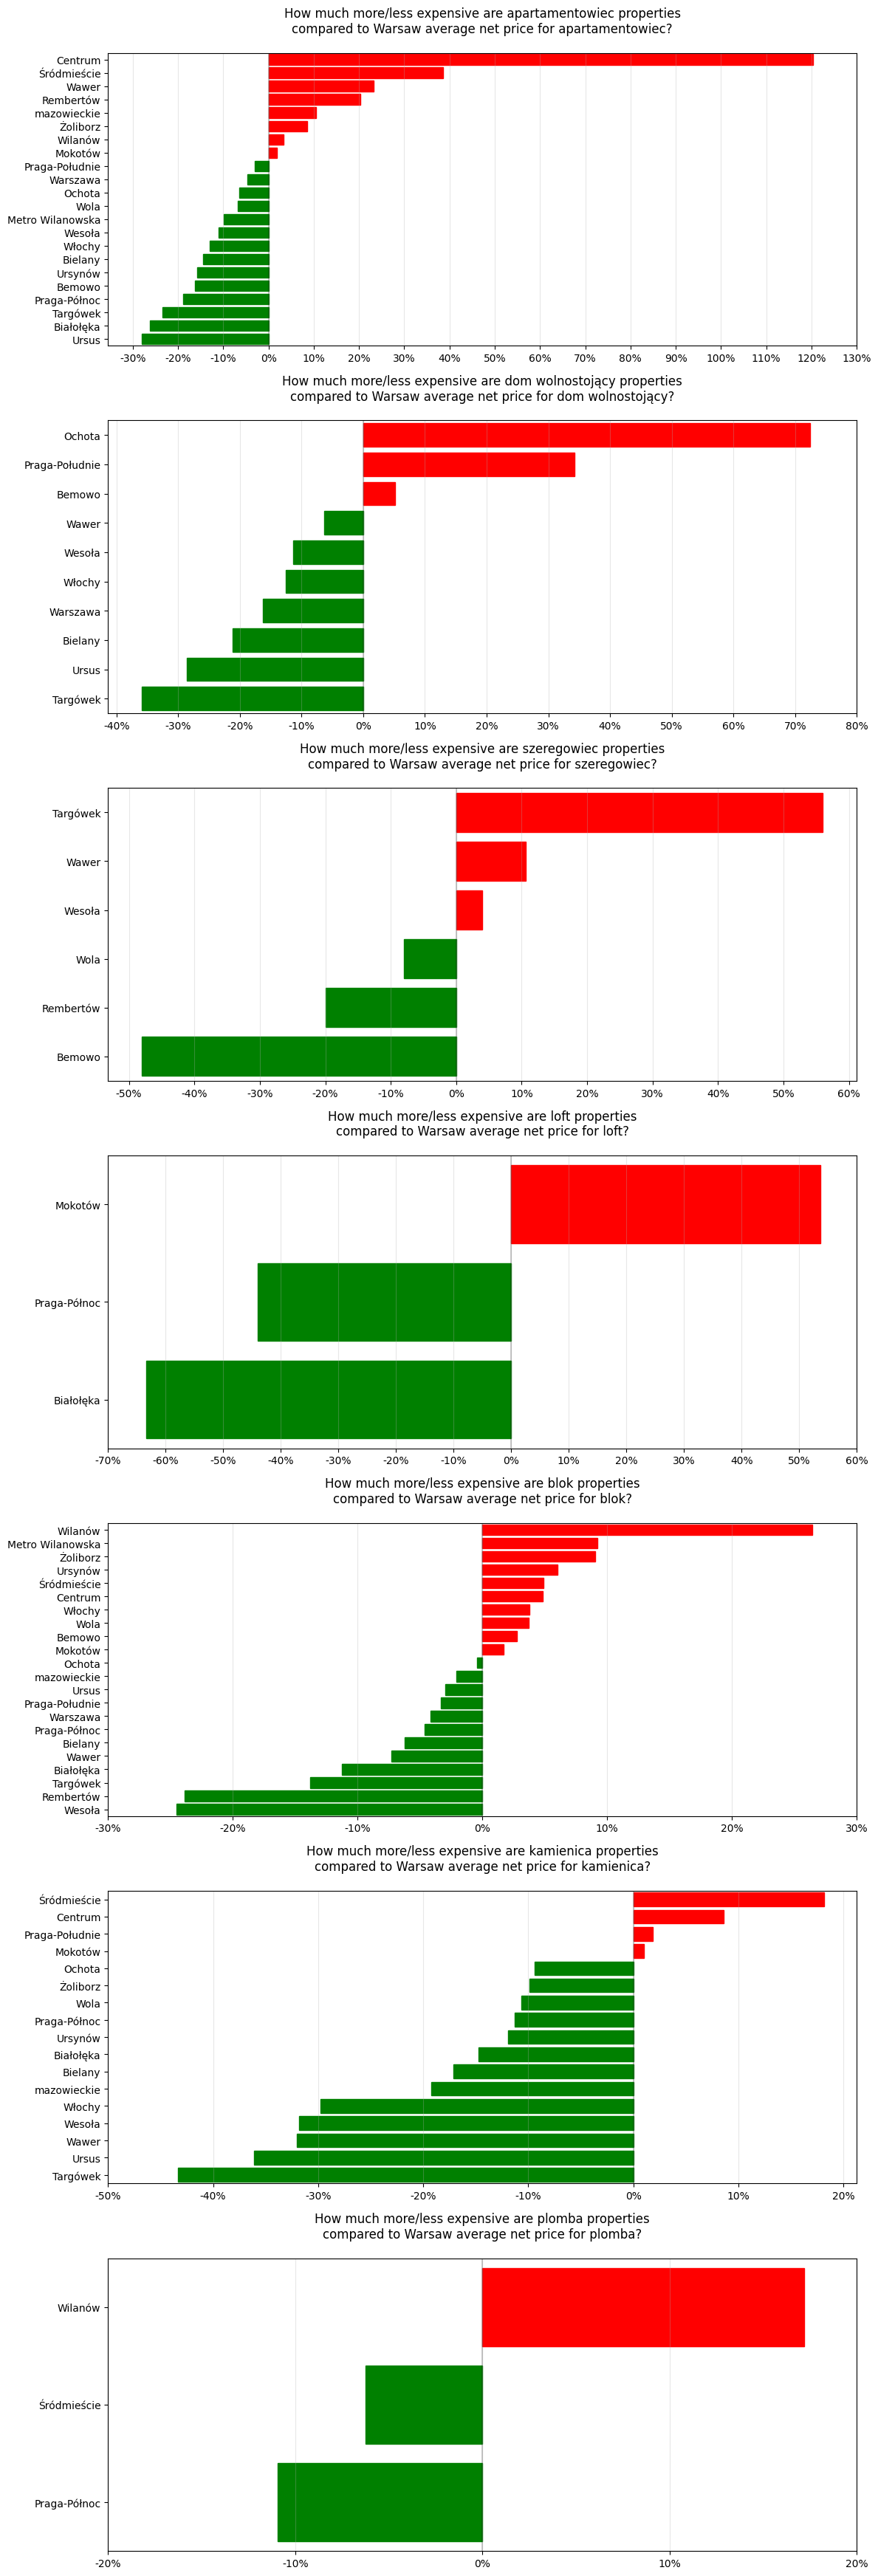

In [550]:
global_avg = df.groupby("build_type")["net_price"].mean()
local_avg = df.groupby(["location", "build_type"])["net_price"].mean()

def calc_percentage_diff(group_avg, global_avg):
    return ((group_avg - global_avg) / global_avg) * 100

# Restructure the data to make the calculation easier
result = pd.DataFrame(local_avg)
result = result.reset_index()

# Merge with global averages
result = result.merge(
    global_avg.reset_index().rename(columns={'net_price': 'global_avg'}),
    on='build_type'
)

# Calculate the percentage difference
result['price_diff_percent'] = round(calc_percentage_diff(
    result['net_price'],
    result['global_avg']
),2)

# Sort to see the biggest differences
result = result.sort_values('price_diff_percent', ascending=False)
result

# Get unique building types
build_types = result['build_type'].unique()

# Create a figure with subplots for each building type
fig, axes = plt.subplots(len(build_types), 1, figsize=(12, 5*len(build_types)))

# Create a plot for each building type
for idx, build_type in enumerate(build_types):
    # Filter data for current building type
    data = result[result['build_type'] == build_type]
    
    # Create horizontal bar plot
    bars = sns.barplot(data=data, y='location', x='price_diff_percent', ax=axes[idx])
    
    # Color the bars
    for i, bar in enumerate(bars.patches):
        if bar.get_width() > 0:
            bar.set_color('red')
        else:
            bar.set_color('green')
    
    # Set more specific title format for each subplot
    axes[idx].set_title(f'How much more/less expensive are {build_type} properties\ncompared to Warsaw average net price for {build_type}?', pad=20)
    axes[idx].axvline(x=0, color='black', linestyle='-', alpha=0.2)
    
    # Remove default labels
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('')
    
    # Add grid for better readability
    axes[idx].grid(axis='x', alpha=0.3)
    
    # Add more x-axis ticks
    max_value = data['price_diff_percent'].max()
    min_value = data['price_diff_percent'].min()
    # Create ticks every 10%
    ticks = np.arange(math.floor(min_value/10)*10, math.ceil(max_value/10)*10 + 10, 10)
    axes[idx].set_xticks(ticks)
    axes[idx].set_xticklabels([f'{x}%' for x in ticks])

plt.tight_layout()
plt.show()

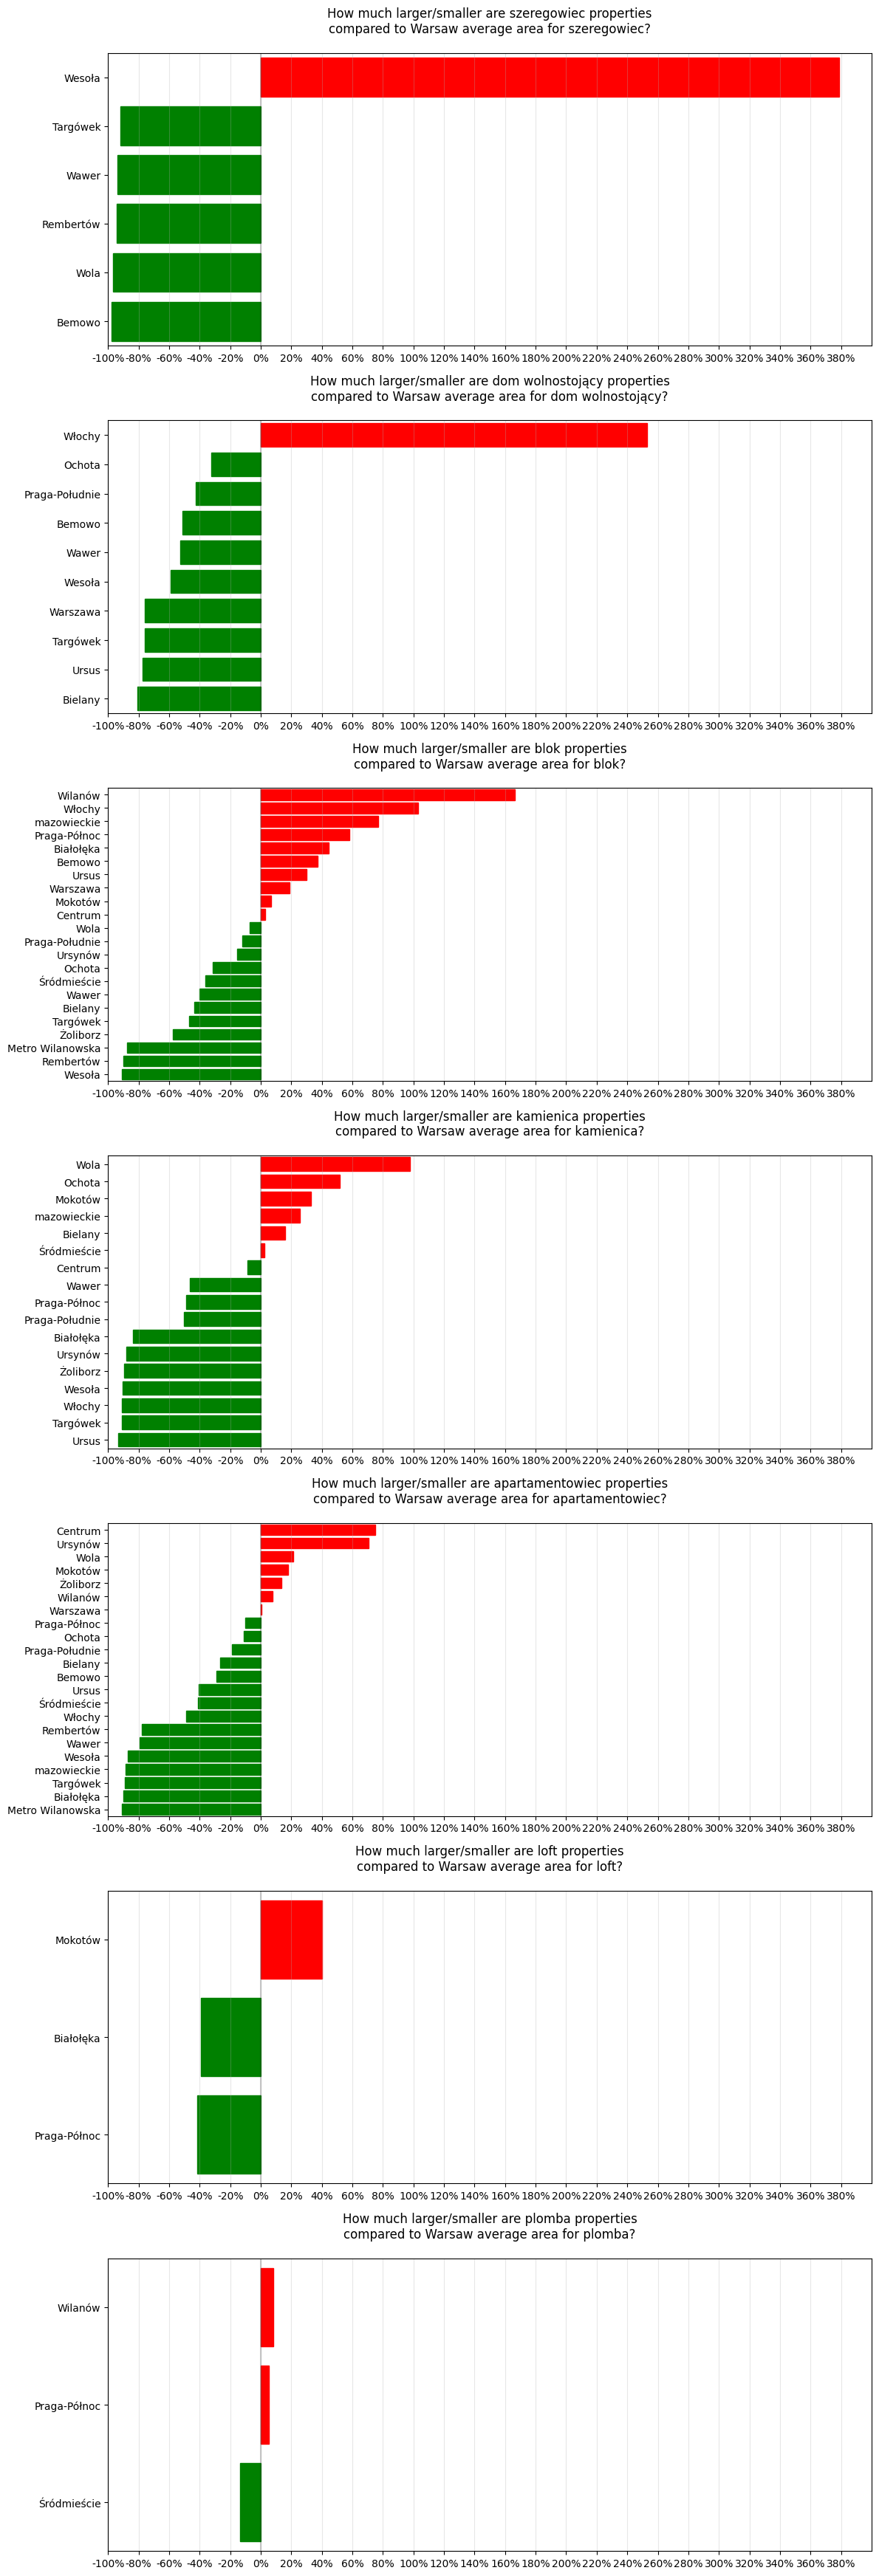

In [551]:
# Calculate averages for area instead of price
global_avg_area = df.groupby("build_type")["area"].mean()
local_avg_area = df.groupby(["location", "build_type"])["area"].mean()

def calc_percentage_diff(group_avg, global_avg):
    return ((group_avg - global_avg) / global_avg) * 100

# Restructure the data to make the calculation easier
result_area = pd.DataFrame(local_avg_area)
result_area = result_area.reset_index()

# Merge with global averages
result_area = result_area.merge(
    global_avg_area.reset_index().rename(columns={'area': 'global_avg'}),
    on='build_type'
)

# Calculate the percentage difference
result_area['area_diff_percent'] = round(calc_percentage_diff(
    result_area['area'],
    result_area['global_avg']
),2)

# Sort to see the biggest differences
result_area = result_area.sort_values('area_diff_percent', ascending=False)

# Get unique building types
build_types = result_area['build_type'].unique()

# Create a figure with subplots for each building type
fig, axes = plt.subplots(len(build_types), 1, figsize=(12, 5*len(build_types)))

# Create a plot for each building type
for idx, build_type in enumerate(build_types):
    # Filter data for current building type
    data = result_area[result_area['build_type'] == build_type]
    
    # Create horizontal bar plot
    bars = sns.barplot(data=data, y='location', x='area_diff_percent', ax=axes[idx])
    
    # Color the bars and add annotations
    for i, bar in enumerate(bars.patches):
        value = bar.get_width()
        if value > 0:
            bar.set_color('red')
            # Add annotation slightly to the right of the bar
        
        else:
            bar.set_color('green')
            # Add annotation slightly to the left of the bar
           
    # Set more specific title format for each subplot
    axes[idx].set_title(f'How much larger/smaller are {build_type} properties\ncompared to Warsaw average area for {build_type}?', pad=20)
    axes[idx].axvline(x=0, color='black', linestyle='-', alpha=0.2)
    
    # Remove default labels
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('')
    
    # Add grid for better readability
    axes[idx].grid(axis='x', alpha=0.3)
    
    # Create asymmetric ticks: -100 to 200 with 20% intervals
    negative_ticks = np.arange(-100, 0, 20)
    positive_ticks = np.arange(0, 400, 20)  # Extended to 200%
    ticks = np.concatenate([negative_ticks, positive_ticks])
    
    axes[idx].set_xticks(ticks)
    axes[idx].set_xticklabels([f'{int(x)}%' for x in ticks])
    
    # Set asymmetric x-axis limits
    axes[idx].set_xlim(-100, 400)  # Keep -100% on left but extend to 200% on right

plt.tight_layout()
plt.show()

In [552]:
# Calculate average differences for each location (across all building types)
price_summary = result.groupby('location')['price_diff_percent'].mean().round(1)
area_summary = result_area.groupby('location')['area_diff_percent'].mean().round(1)

# Combine into one dataframe
summary_df = pd.DataFrame({
    'Price Numeric': price_summary,
    'Area Numeric': area_summary
})

# Add formatted display columns
summary_df['Price Display'] = summary_df['Price Numeric'].apply(lambda x: f"{'+' if x > 0 else ''}{x}%")
summary_df['Area Display'] = summary_df['Area Numeric'].apply(lambda x: f"{'+' if x > 0 else ''}{x}%")

# First sort by area ascending, then by price descending
summary_df = summary_df.sort_values(['Area Numeric', 'Price Numeric'], 
                                  ascending=[True, False])

# Display with enhanced styling
display(summary_df[['Price Display', 'Area Display']].style
        .set_caption("Average Price and Area Differences by Location")
        .set_properties(**{
            'text-align': 'center',
            'border': '1px solid black',
            'padding': '8px'
        })
        .set_table_styles([
            {'selector': 'caption', 
             'props': [('text-align', 'center'), 
                      ('font-size', '16px'), 
                      ('font-weight', 'bold'),
                      ('padding', '10px')]},
            {'selector': 'th', 
             'props': [('text-align', 'center'), 
                      ('background-color', '#2c3e50'), 
                      ('color', 'white'),
                      ('font-weight', 'bold'),
                      ('border', '2px solid black'),
                      ('padding', '8px')]},
            {'selector': 'td', 
             'props': [('border', '1px solid black'),
                      ('padding', '8px')]},
            {'selector': '', 
             'props': [('border-collapse', 'collapse'),
                      ('border', '2px solid black'),
                      ('background-color', '#f8f9fa')]},
        ])
        .background_gradient(subset=['Price Display'], 
                           gmap=summary_df['Price Numeric'],
                           cmap='RdYlGn_r',  # Red for high prices (bad)
                           text_color_threshold=0.5,
                           vmin=-50,
                           vmax=50)
        .background_gradient(subset=['Area Display'], 
                           gmap=summary_df['Area Numeric'],
                           cmap='RdYlGn',    # Green for high areas (good)
                           text_color_threshold=0.5,
                           vmin=-50,
                           vmax=50))

,Price Display,Area Display
location,,
Metro Wilanowska,-0.3%,-89.2%
Rembertów,-7.9%,-87.4%
Targówek,-12.1%,-79.0%
Wawer,-2.4%,-62.5%
Ursus,-23.9%,-45.2%
Żoliborz,+2.5%,-44.6%
Białołęka,-28.9%,-41.9%
Bemowo,-14.1%,-35.2%
Bielany,-14.8%,-33.7%


In [553]:
df["add_info"].unique()

array(['', nan], dtype=object)

In [554]:
df["rest_info"].unique()


array(['', nan], dtype=object)

In [555]:
df["security"].unique()

array(['', '/', nan], dtype=object)

In [556]:
df["agd"].unique()

array(['', nan, '/'], dtype=object)

In [557]:
df.drop(["agd","security","rest_info","add_info"], axis = 1, inplace = True)

In [558]:
df_encoded = pd.get_dummies(df)

In [559]:
imp = SimpleImputer(missing_values =np.nan, strategy ='mean')

In [560]:
imputed_df = pd.DataFrame(imp.fit_transform(df_encoded), columns = df_encoded.columns)

In [561]:
imputed_df

,net_price,deposit,area,room_num,floor,total_floor,year_built,add_cost,pokoj_url_mention,is_internet,...,windows_drewniane,windows_plastikowe,heating_elektryczne,heating_gazowe,heating_inne,heating_kotłownia,heating_miejskie,status_do remontu,status_do wykończenia,status_do zamieszkania
0,2100.0,2100.000000,37.0,2.0,3.777778,4.000000,2007.41329,811.207311,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1825.0,3400.000000,38.0,2.0,3.777778,6.587192,2020.00000,350.000000,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3300.0,3300.000000,57.0,3.0,3.777778,15.000000,1984.00000,1.000000,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2200.0,2674.311825,63.0,2.0,4.000000,5.000000,2005.00000,811.207311,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3000.0,3000.000000,65.0,3.0,3.000000,4.000000,1938.00000,811.207311,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,2000.0,2500.000000,45.0,1.0,3.000000,7.000000,2007.41329,350.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3478,3300.0,3000.000000,50.0,2.0,1.000000,2.000000,2006.00000,811.207311,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3479,2500.0,2500.000000,4666.0,2.0,5.000000,5.000000,2015.00000,811.207311,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3480,1300.0,1700.000000,23.0,1.0,3.777778,4.000000,1938.00000,270.000000,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


<Axes: xlabel='deposit', ylabel='Count'>

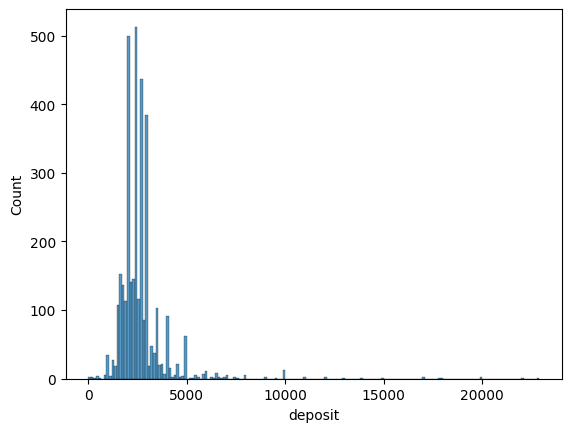

In [562]:
sns.histplot(data = imputed_df, x = "deposit")

(0.0, 30000.0)

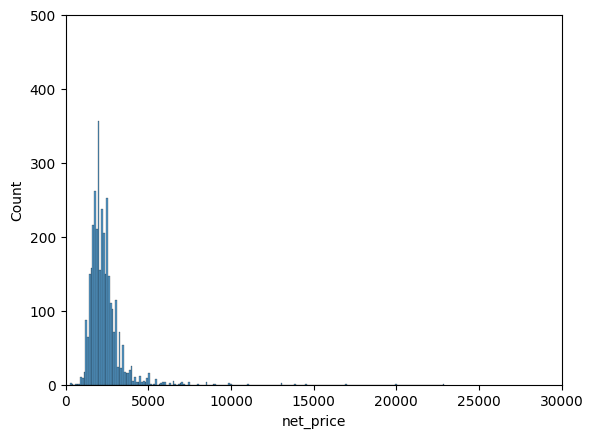

In [563]:
sns.histplot(data = imputed_df, x = "net_price")
plt.ylim(0, 500)
plt.xlim(0,30000)

(0.0, 5000.0)

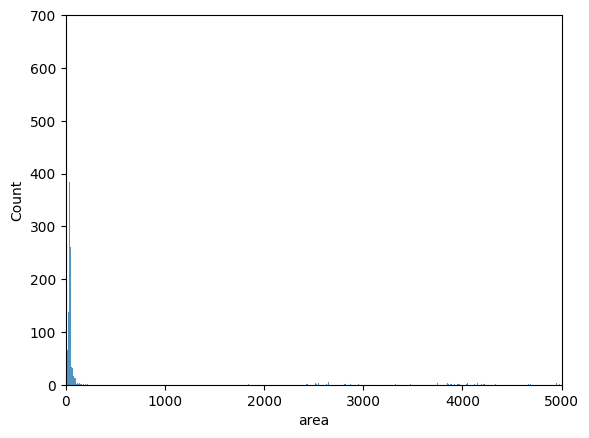

In [564]:
sns.histplot(data = imputed_df, x = "area", stat = "count")
plt.ylim(0, 700)
plt.xlim(0,5000)

<Axes: xlabel='net_price'>

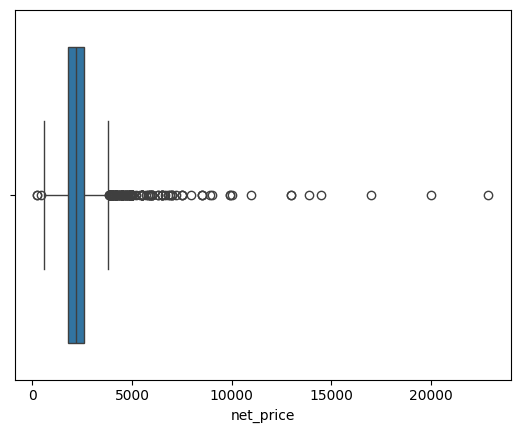

In [565]:
sns.boxplot(x = imputed_df["net_price"])

<Axes: xlabel='area'>

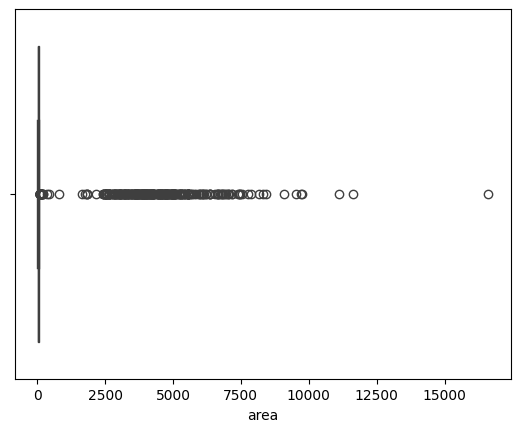

In [566]:
sns.boxplot(x = imputed_df["area"])

In [567]:
# Apply Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(imputed_df)

# Get anomaly scores and predictions
scores = iso_forest.decision_function(imputed_df)
predictions = iso_forest.predict(imputed_df)

In [568]:
# Add results to the dataframe
imputed_df['anomaly_score'] = scores
imputed_df['is_anomaly'] = predictions == -1

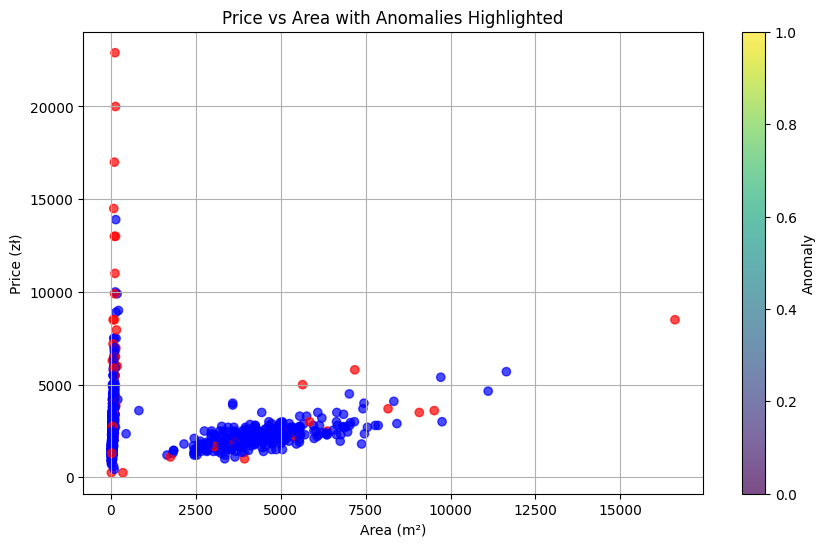

Detected 175 anomalies out of 3482 records (5.03%)

Top 10 anomalies:
      net_price  deposit     area  room_num      floor  total_floor  \
2556     2000.0   2450.0     57.0       2.0   3.777778     2.000000   
1182     2500.0   2500.0     60.0       3.0   3.777778     1.000000   
1595    14500.0  20000.0     80.0       2.0  10.000000    54.000000   
1307     4999.0   4999.0     95.0       4.0   4.000000    20.000000   
475      1500.0   3000.0     38.0       1.0   1.000000     6.587192   
2981     1000.0   1000.0   3932.0       2.0   2.000000     4.000000   
1934     3500.0   7000.0   9080.0       4.0   3.777778     2.000000   
72      22900.0  22900.0    117.0       3.0  10.000000    54.000000   
220      8500.0  17000.0  16610.0       5.0   4.000000     5.000000   
175     20000.0  20000.0    133.0       3.0  10.000000    54.000000   

      year_built    add_cost  pokoj_url_mention  is_internet  ...  \
2556  2007.41329  450.000000                1.0          0.0  ...   
1182  2019

In [569]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(
    imputed_df['area'], 
    imputed_df['net_price'],
    c=imputed_df['is_anomaly'].map({True: 'red', False: 'blue'}),
    alpha=0.7
)
plt.title('Price vs Area with Anomalies Highlighted')
plt.xlabel('Area (m²)')
plt.ylabel('Price (zł)')
plt.colorbar(label='Anomaly')
plt.grid(True)
plt.show()

# Print summary
anomaly_count = imputed_df['is_anomaly'].sum()
print(f"Detected {anomaly_count} anomalies out of {len(imputed_df)} records ({anomaly_count/len(imputed_df):.2%})")
print("\nTop 10 anomalies:")
print(imputed_df[imputed_df['is_anomaly']].sort_values('anomaly_score').head(10))

In [570]:
# Remove anomalies from the dataset
cleaned_df = imputed_df[imputed_df['is_anomaly'] == 0].copy()

# Print the shape before and after removing anomalies
print(f"Original dataset shape: {df_encoded.shape}")
print(f"Cleaned dataset shape: {cleaned_df.shape}")
print(f"Removed {df_encoded.shape[0] - cleaned_df.shape[0]} anomalous records")

Original dataset shape: (3482, 89)
Cleaned dataset shape: (3307, 91)
Removed 175 anomalous records


# ML

In [571]:
cleaned_df

,net_price,deposit,area,room_num,floor,total_floor,year_built,add_cost,pokoj_url_mention,is_internet,...,heating_elektryczne,heating_gazowe,heating_inne,heating_kotłownia,heating_miejskie,status_do remontu,status_do wykończenia,status_do zamieszkania,anomaly_score,is_anomaly
0,2100.0,2100.000000,37.0,2.0,3.777778,4.000000,2007.41329,811.207311,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.056798,False
1,1825.0,3400.000000,38.0,2.0,3.777778,6.587192,2020.00000,350.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.065286,False
2,3300.0,3300.000000,57.0,3.0,3.777778,15.000000,1984.00000,1.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.037741,False
3,2200.0,2674.311825,63.0,2.0,4.000000,5.000000,2005.00000,811.207311,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.082312,False
4,3000.0,3000.000000,65.0,3.0,3.000000,4.000000,1938.00000,811.207311,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.070420,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476,2000.0,2000.000000,39.0,2.0,10.000000,15.000000,2007.41329,811.207311,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.026532,False
3477,2000.0,2500.000000,45.0,1.0,3.000000,7.000000,2007.41329,350.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.041078,False
3478,3300.0,3000.000000,50.0,2.0,1.000000,2.000000,2006.00000,811.207311,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.077386,False
3479,2500.0,2500.000000,4666.0,2.0,5.000000,5.000000,2015.00000,811.207311,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.050221,False


In [572]:

X = cleaned_df.iloc[:, 1:]  
y = cleaned_df.iloc[:, 0]   

In [573]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [574]:
def evaluate_regression_model(model, X_train, X_test, y_train, y_test, model_name="Regression Model", 
                             currency="zł", show_plots=True, feature_importance=True):
    """
    Evaluate a regression model and visualize its performance.
    
    Parameters:
    -----------
    model : estimator object
        The trained model to evaluate
    X_train : array-like
        Training features
    X_test : array-like
        Test features
    y_train : array-like
        Training target values
    y_test : array-like
        Test target values
    model_name : str, default="Regression Model"
        Name of the model for plot titles
    currency : str, default="zł"
        Currency symbol for price units
    show_plots : bool, default=True
        Whether to display performance plots
    feature_importance : bool, default=True
        Whether to calculate and display feature importance (if available)
        
    Returns:
    --------
    dict
        Dictionary containing evaluation metrics and model
    """
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    # Print results
    print(f"\n{model_name} Performance:")
    print(f"Training RMSE: {train_rmse:.2f} {currency}")
    print(f"Test RMSE: {test_rmse:.2f} {currency}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Training MAE: {train_mae:.2f} {currency}")
    print(f"Test MAE: {test_mae:.2f} {currency}")
    
    # Store results in a dictionary
    results = {
        'model': model,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'y_pred_train': y_pred_train,
        'y_pred_test': y_pred_test
    }
    
    if show_plots:
        # Visualize predictions vs actual
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred_test, alpha=0.5)
        min_val = min(y_test.min(), y_pred_test.min())
        max_val = max(y_test.max(), y_pred_test.max())
        plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
        plt.xlabel(f'Actual Price ({currency})')
        plt.ylabel(f'Predicted Price ({currency})')
        plt.title(f'{model_name}: Actual vs Predicted Prices')
        plt.tight_layout()
        plt.show()
        
        # Visualize residuals
        residuals = y_test - y_pred_test
        plt.figure(figsize=(10, 6))
        plt.scatter(y_pred_test, residuals, alpha=0.5)
        plt.hlines(y=0, xmin=y_pred_test.min(), xmax=y_pred_test.max(), colors='k', linestyles='--')
        plt.xlabel(f'Predicted Price ({currency})')
        plt.ylabel(f'Residuals ({currency})')
        plt.title(f'{model_name}: Residuals Plot')
        plt.tight_layout()
        plt.show()
    
    # Feature importance for models that support it
    if feature_importance:
        if hasattr(model, 'coef_'):
            # Linear models like Lasso, Ridge, ElasticNet
            if hasattr(X_train, 'columns'):
                # If X_train is a DataFrame with column names
                feature_names = X_train.columns.tolist()
            else:
                # If X_train is a numpy array
                feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]
                
            # Get coefficients
            coefficients = model.coef_
            
            # Create DataFrame of feature importance
            feature_importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Coefficient': coefficients
            })
            
            # Sort by absolute coefficient value
            feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
            feature_importance_df = feature_importance_df.sort_values('Abs_Coefficient', ascending=False)
            
            if show_plots:
                # Plot feature importance
                plt.figure(figsize=(12, 8))
                top_n = min(20, len(feature_importance_df))
                sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df.head(top_n))
                plt.title(f'{model_name}: Feature Importance')
                plt.tight_layout()
                plt.show()
            
            print(f"\nTop 10 Most Important Features:")
            display(feature_importance_df.head(10))
            
            results['feature_importance'] = feature_importance_df
            
        elif hasattr(model, 'feature_importances_'):
            # Tree-based models like RandomForest, GradientBoosting
            if hasattr(X_train, 'columns'):
                # If X_train is a DataFrame with column names
                feature_names = X_train.columns.tolist()
            else:
                # If X_train is a numpy array
                feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]
                
            # Get feature importances
            importances = model.feature_importances_
            
            # Create DataFrame of feature importance
            feature_importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances
            })
            
            # Sort by importance
            feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
            
            if show_plots:
                # Plot feature importance
                plt.figure(figsize=(12, 8))
                top_n = min(20, len(feature_importance_df))
                sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
                plt.title(f'{model_name}: Feature Importance')
                plt.tight_layout()
                plt.show()
            
            print(f"\nTop 10 Most Important Features:")
            display(feature_importance_df.head(10))
            
            results['feature_importance'] = feature_importance_df
    
    return results

In [575]:
def train_and_evaluate_model(model, param_grid, X_train, X_test, y_train, y_test, 
                            cv=5, scoring='neg_mean_squared_error', n_jobs=-1, 
                            model_name="Regression Model", currency="zł"):
    """
    Train a model with hyperparameter optimization and evaluate its performance.
    """
    from sklearn.model_selection import GridSearchCV, KFold
    
    # Set up K-Fold cross-validation
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Create GridSearchCV
    grid_search = GridSearchCV(
        model,
        param_grid,
        cv=kfold,
        scoring=scoring,
        n_jobs=n_jobs,
        verbose=1
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Print best parameters
    print(f"Best parameters: {grid_search.best_params_}")
    
    # Evaluate the model
    results = evaluate_regression_model(
        best_model, X_train, X_test, y_train, y_test, 
        model_name=model_name, currency=currency
    )
    
    # Add grid search results to the output
    results['grid_search'] = grid_search
    results['best_params'] = grid_search.best_params_
    
    return results

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'alpha': 0.4832930238571752, 'max_iter': 1000, 'tol': 0.0001}

Lasso Regression Performance:
Training RMSE: 456.56 zł
Test RMSE: 417.61 zł
Training R²: 0.6940
Test R²: 0.6767
Training MAE: 308.13 zł
Test MAE: 310.57 zł


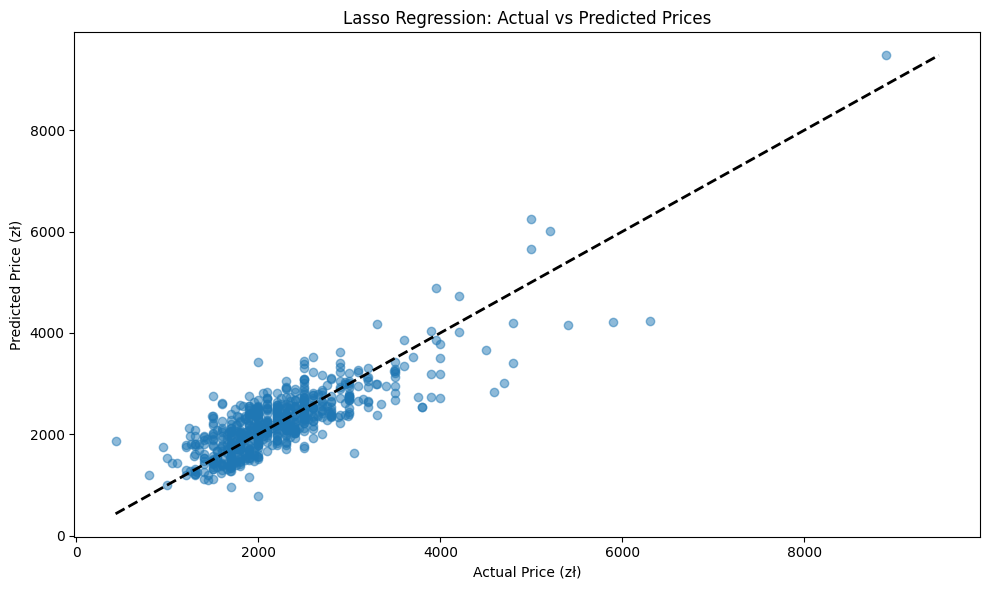

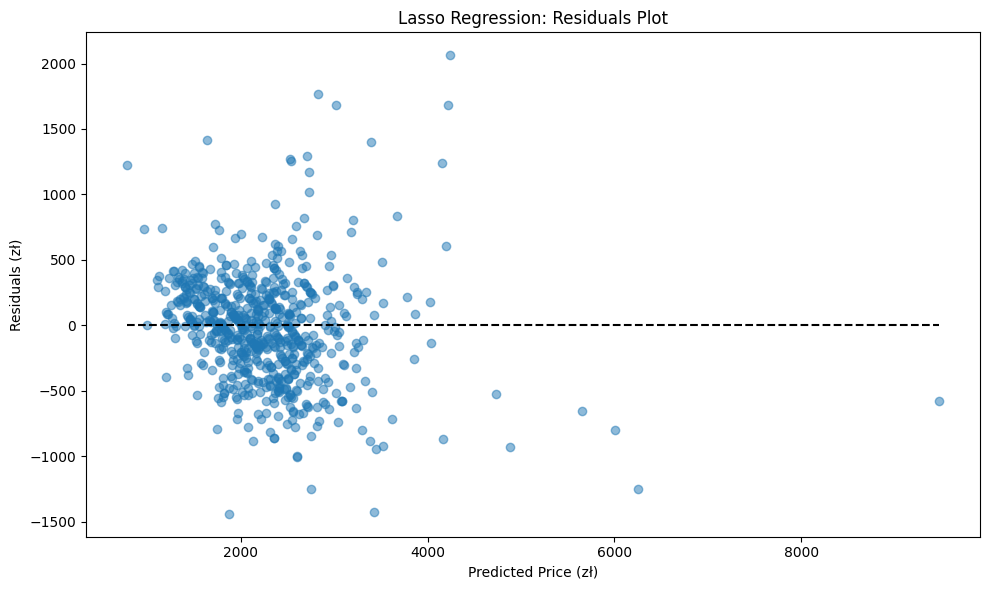

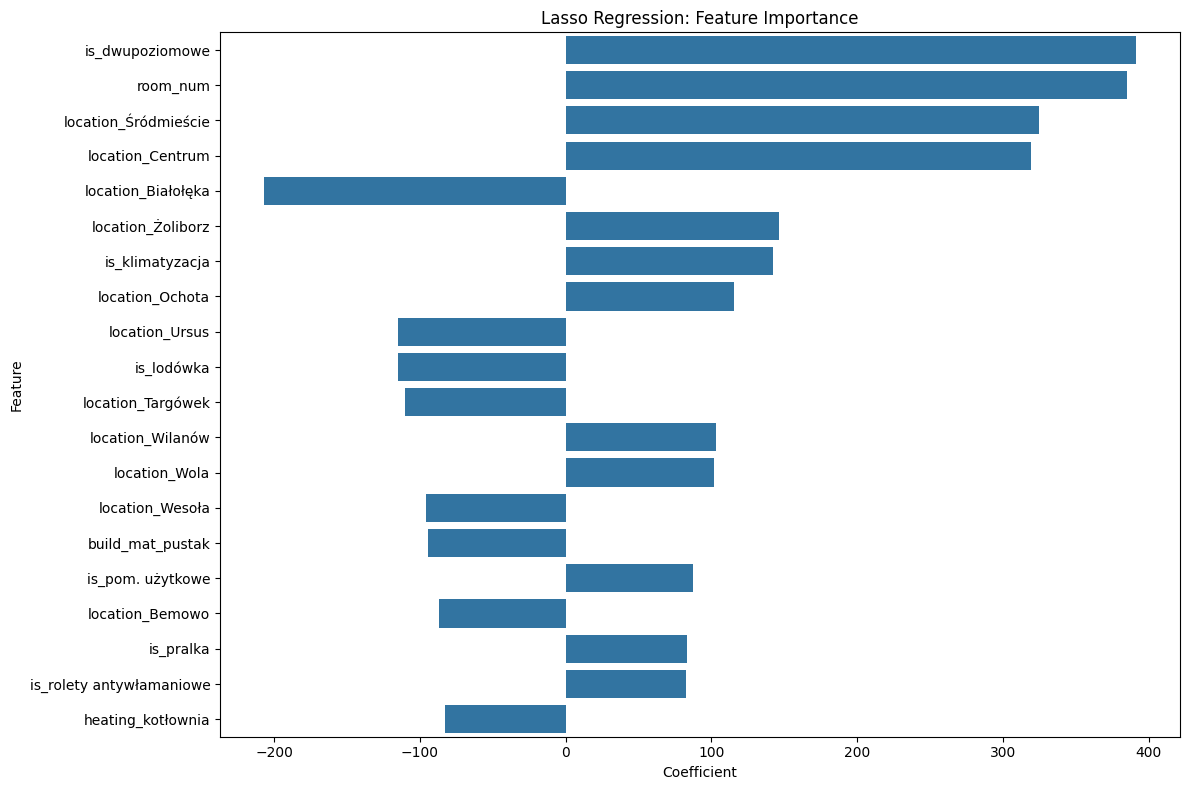


Top 10 Most Important Features:


,Feature,Coefficient,Abs_Coefficient
20,is_dwupoziomowe,391.547347,391.547347
2,room_num,385.132552,385.132552
58,location_Śródmieście,324.795578,324.795578
41,location_Centrum,319.198853,319.198853
39,location_Białołęka,-207.141276,207.141276
59,location_Żoliborz,146.058676,146.058676
19,is_klimatyzacja,142.511066,142.511066
44,location_Ochota,115.354486,115.354486
49,location_Ursus,-115.218643,115.218643
24,is_lodówka,-115.211805,115.211805


In [576]:
# For Lasso Regression
from sklearn.linear_model import Lasso

# Define the model and parameter grid
lasso = Lasso(random_state=42)
param_grid = {
    'alpha': np.logspace(-4, 1, 20),
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Train and evaluate
lasso_results = train_and_evaluate_model(
    lasso, 
    param_grid, 
    X_train, X_test, y_train, y_test,
    model_name="Lasso Regression"
)